# Lead Scoring Case Study
### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Reading and Understanding the Data

In [1782]:
# Importing required libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1783]:
# Importing the dataframe
churn = pd.read_csv("Leads.csv")
churn.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1784]:
# Let's see the type of each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1785]:
# Let's check the dimensions of the dataframe
churn.shape

(9240, 37)

In [1786]:
# Check the percentiles data for all the numerical variables. Introduce few more percentiles like 90, 95, 99, 99.5 and 99.7
churn.describe(percentiles=[0,0.25,0.50,0.75,0.80,0.90,0.95,0.99, 0.995, 0.997, 0.999, 1])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
80%,641577.600000,1.000000,5.000000,1087.200000,4.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000


Text(0.5, 1.0, 'Total Visits')

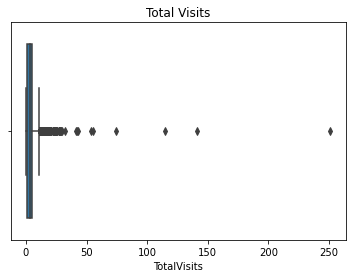

In [1787]:
# Plot a boxplot to check for outliers in TotalVisits
sns.boxplot(churn["TotalVisits"])
plt.title('Total Visits')

In [1788]:
# Remove the entries from the dataframe which has TotalVisits > 32
churn.drop(churn[churn["TotalVisits"] > 32].index, inplace = True)

In [1789]:
# Check the dimensions of the dataframe
churn.shape

(9231, 37)

In [1790]:
# Check the file header
churn.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Cleansing and Visualising the Data

In [1791]:
# For all columns that have values of 'Yes' and 'No', check the distribution of data
for column_name in ["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article", 
                    "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations",
                   "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content",
                   "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]:
    print(column_name, "->", churn[column_name].unique(), "\n", churn[column_name].value_counts())

Do Not Email -> ['No' 'Yes'] 
 No     8503
Yes     728
Name: Do Not Email, dtype: int64
Do Not Call -> ['No' 'Yes'] 
 No     9229
Yes       2
Name: Do Not Call, dtype: int64
Search -> ['No' 'Yes'] 
 No     9217
Yes      14
Name: Search, dtype: int64
Magazine -> ['No'] 
 No    9231
Name: Magazine, dtype: int64
Newspaper Article -> ['No' 'Yes'] 
 No     9229
Yes       2
Name: Newspaper Article, dtype: int64
X Education Forums -> ['No' 'Yes'] 
 No     9230
Yes       1
Name: X Education Forums, dtype: int64
Newspaper -> ['No' 'Yes'] 
 No     9230
Yes       1
Name: Newspaper, dtype: int64
Digital Advertisement -> ['No' 'Yes'] 
 No     9227
Yes       4
Name: Digital Advertisement, dtype: int64
Through Recommendations -> ['No' 'Yes'] 
 No     9224
Yes       7
Name: Through Recommendations, dtype: int64
Receive More Updates About Our Courses -> ['No'] 
 No    9231
Name: Receive More Updates About Our Courses, dtype: int64
Update me on Supply Chain Content -> ['No'] 
 No    9231
Name: Update me

In [1792]:
# Drop all Columns where there is only one value 'No' as they don't help in buidling the model
churn.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
                "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1, inplace=True)

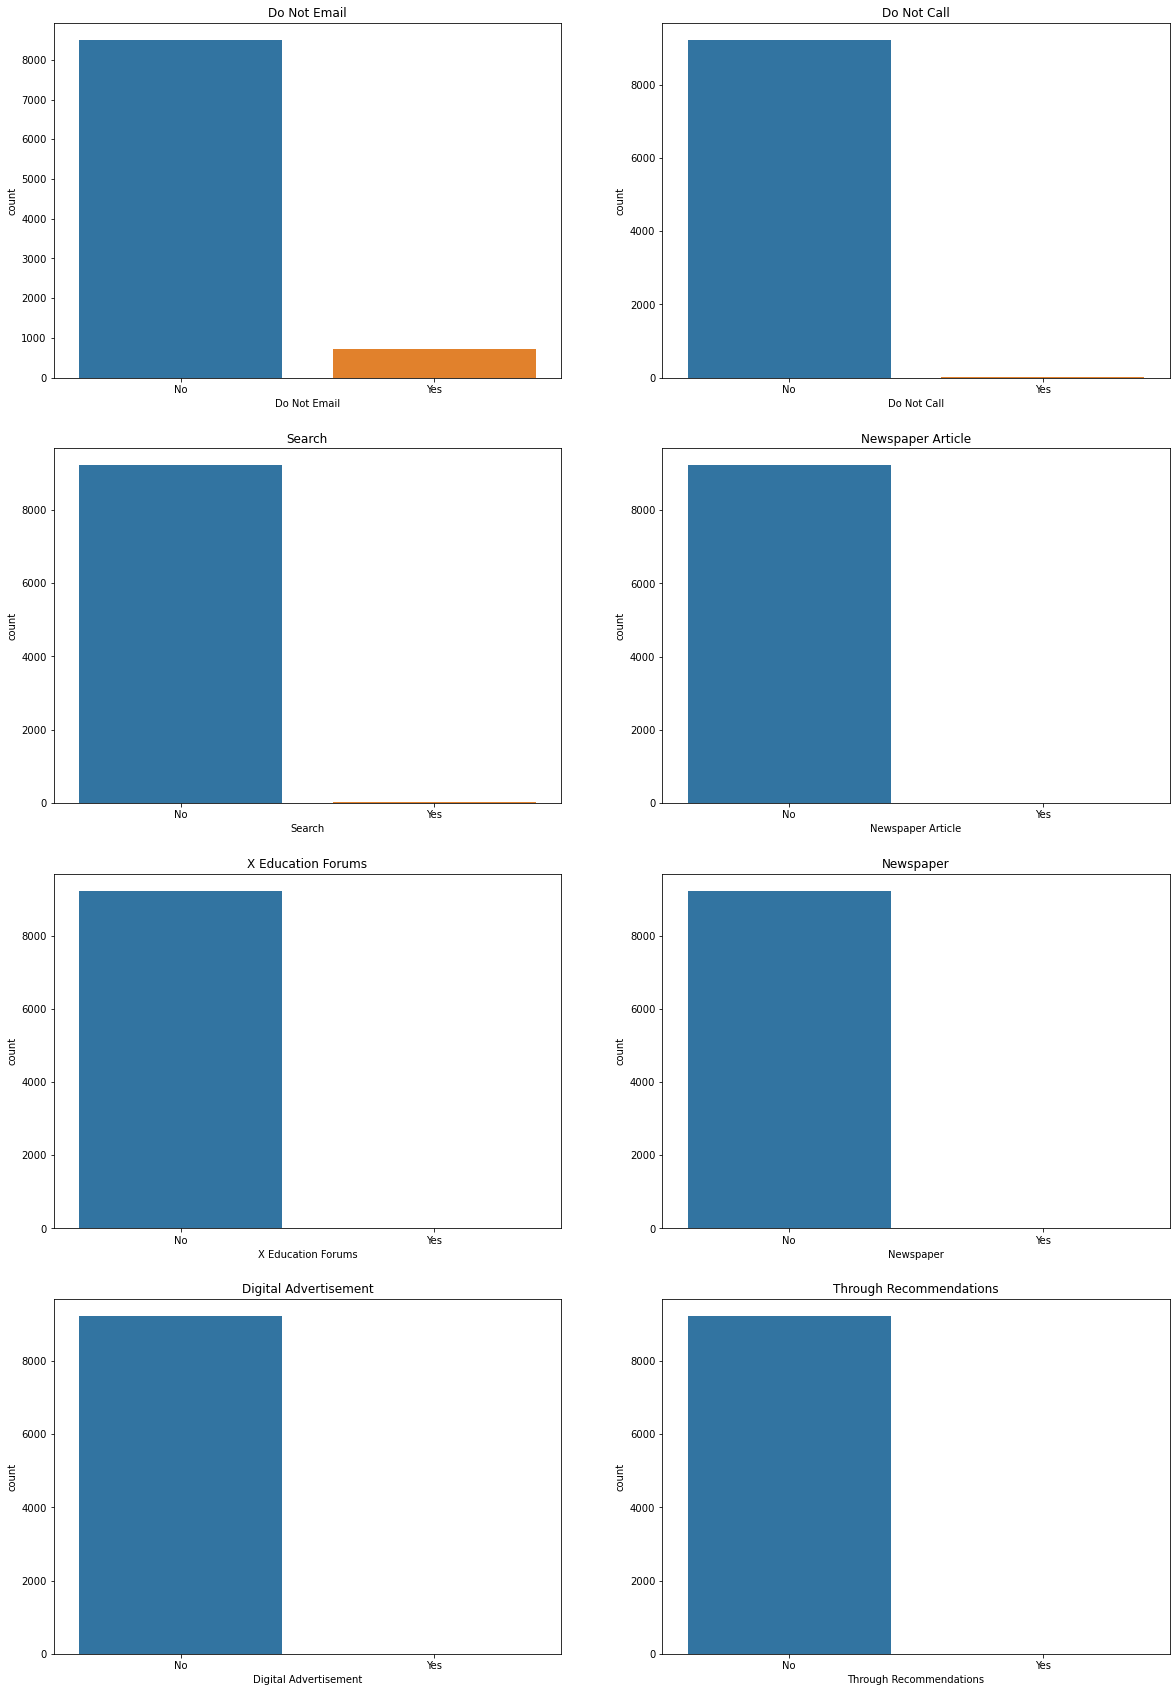

In [1793]:
# Bar graphs for all the binary variables having 'Yes' or 'No' values
plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
sns.countplot(churn['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,2)
sns.countplot(churn['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(4,2,3)
sns.countplot(churn['Search'])
plt.title('Search')

plt.subplot(4,2,4)
sns.countplot(churn['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,2,5)
sns.countplot(churn['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,2,6)
sns.countplot(churn['Newspaper'])
plt.title('Newspaper')

plt.subplot(4,2,7)
sns.countplot(churn['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(4,2,8)
sns.countplot(churn['Through Recommendations'])
plt.title('Through Recommendations')

plt.show()

In [1794]:
# Check the dimensions of the dataframe again
churn.shape

(9231, 32)

In [1795]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
churn[varlist] = churn[varlist].apply(binary_map)

In [1796]:
# Check header
churn.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [1797]:
# Check the number of null values in each columns of the dataframe
churn.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2204
What is your current occupation                  2687
What matters most to you in choosing a course    2705
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [1798]:
# Many columns have Null values, hence lets try to drop/impute Columns if more than 40% of the values are Null
blank_per = (churn.isna().sum()*100)/len(churn)
blank_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389990
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.484130
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.484130
Last Activity                                     1.115805
Country                                          26.660167
Specialization                                   15.577944
How did you hear about X Education               23.876070
What is your current occupation                  29.108439
What matters most to you in choosing a course    29.303434
Search                                            0.0000

In [1799]:
# Lets drop/impute Columns if more than 40% of the values are Null
appl1_blank_per = blank_per[blank_per>=40]
appl1_blank_per

Lead Quality                   51.587044
Asymmetrique Activity Index    45.639692
Asymmetrique Profile Index     45.639692
Asymmetrique Activity Score    45.639692
Asymmetrique Profile Score     45.639692
dtype: float64

In [1800]:
# Dropping the columns where Blank values > 40%, as these columns dont help in predicting the Churn
churn = churn.drop(columns = appl1_blank_per.index)

In [1801]:
# Check shape to ensure all the above 5 columns are dropped
churn.shape

(9231, 27)

In [1802]:
# Check for the Null values in all the columns after removing the above 5 columns
churn.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2204
What is your current occupation                  2687
What matters most to you in choosing a course    2705
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [1803]:
# Let's fill the Null values for 'Lead Source'
churn["Lead Source"].value_counts(dropna = False)

Google               2868
Direct Traffic       2536
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1804]:
# As it's a categorical variable, let's fill Null values with Mode
churn["Lead Source"] = churn["Lead Source"].fillna(churn["Lead Source"].mode()[0])

In [1805]:
# After filling the Null values with Mode (Google), checking that the no. of entries have increased
churn["Lead Source"].value_counts(dropna = False)

Google               2904
Direct Traffic       2536
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1806]:
# Check the various Values and counts of each value for the field TotalVisits
churn["TotalVisits"].value_counts(dropna = False)

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
NaN      137
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
18.0      15
20.0      12
19.0       9
21.0       6
23.0       6
25.0       5
27.0       5
24.0       5
22.0       3
29.0       2
28.0       2
26.0       2
30.0       1
32.0       1
Name: TotalVisits, dtype: int64

In [1807]:
# Even though TotalVisits is of type Float, filling Null with Mean will be incorrect in this case. Hence, we can go with either 
# Median or Mode. Let's choose Median

churn["TotalVisits"] = churn["TotalVisits"].fillna(churn["TotalVisits"].median())

In [1808]:
# After filling Null values with Median (3.0), check that the no. of entries have increased for 3.0
churn["TotalVisits"].value_counts(dropna = False)

0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
18.0      15
20.0      12
19.0       9
21.0       6
23.0       6
25.0       5
27.0       5
24.0       5
22.0       3
26.0       2
29.0       2
28.0       2
30.0       1
32.0       1
Name: TotalVisits, dtype: int64

Text(0.5, 1.0, 'Page Views Per Visit')

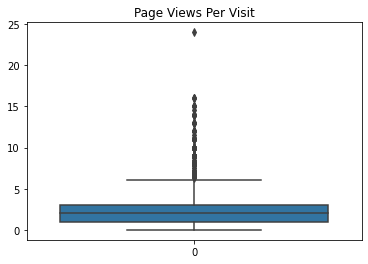

In [1809]:
# Check the data spread and outliers for the 'Page Views Per Visit' field
sns.boxplot(data = churn["Page Views Per Visit"])
plt.title('Page Views Per Visit')

In [1810]:
# Remove that one single entry which is the outlier
churn.drop(churn[churn["Page Views Per Visit"] == churn["Page Views Per Visit"].max()].index, 
                inplace = True)

Text(0.5, 1.0, 'Page Views Per Visit')

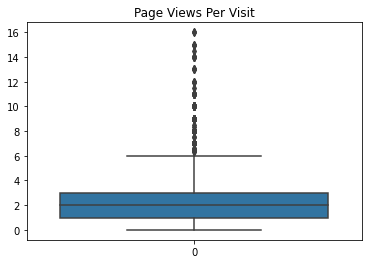

In [1811]:
# Plot again to see that the outlieris removed successfully
sns.boxplot(data = churn["Page Views Per Visit"])
plt.title('Page Views Per Visit')

In [1812]:
# Replace the Null values of "Page Views Per Visit" with Mean
churn["Page Views Per Visit"] = churn["Page Views Per Visit"].fillna(churn["Page Views Per Visit"].mean())

In [1813]:
# Recheck that there are no more null values in "Page Views Per Visit" 
churn["Page Views Per Visit"].isna().sum()

0

In [1814]:
# Check null values for Last Activity
churn["Last Activity"].value_counts(dropna = False)

Email Opened                    3436
SMS Sent                        2744
Olark Chat Conversation          973
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1815]:
# As it's a categorical variable, let's fill Null values with Mode
churn["Last Activity"] = churn["Last Activity"].fillna(churn["Last Activity"].mode()[0])

In [1816]:
# Check that the Email Opened category values have increased after filling Null values with Mode
churn["Last Activity"].value_counts(dropna = False)

Email Opened                    3539
SMS Sent                        2744
Olark Chat Conversation          973
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1817]:
# Check Null and other values for Country
churn["Country"].value_counts(dropna = False)

India                   6483
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
unknown                    4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1818]:
# Let's drop the 'Country' column as most of the values is 'India'
churn.drop(columns = "Country", inplace=True)

In [1819]:
# Check values for Specialization
churn["Specialization"].value_counts(dropna = False)

Select                               1939
NaN                                  1437
Finance Management                    976
Human Resource Management             847
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                365
Supply Chain Management               348
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                      99
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1820]:
# Replacing 'Select' with NaN (Since it means no option is selected)
churn["Specialization"] = churn["Specialization"].replace('Select',np.nan)

In [1821]:
# As the no. of Null values is high, removing data would result in less data for modeling. Hence, retain the rows by
# filling 'no data'
churn['Specialization'] = churn['Specialization'].fillna('no data')

In [1822]:
# Check the values again
churn["Specialization"].value_counts(dropna = False)

no data                              3376
Finance Management                    976
Human Resource Management             847
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                365
Supply Chain Management               348
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                      99
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1823]:
# Similarly, check values for "How did you hear about X Education"
churn["How did you hear about X Education"].value_counts(dropna = False)

Select                   5041
NaN                      2203
Online Search             806
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             68
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1824]:
# Let's drop the column as sum of Select and NaN is more than 70%
churn.drop(columns = "How did you hear about X Education", inplace=True)

In [1825]:
# Check values for "What is your current occupation"
churn["What is your current occupation"].value_counts(dropna = False)

Unemployed              5594
NaN                     2686
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1826]:
# As it's a categorical variable, let's fill Null values with Mode
churn["What is your current occupation"] = churn["What is your current occupation"].fillna(churn["What is your current occupation"].mode()[0])

In [1827]:
# Check the entries again to ensure Null values are replaced by Mode
churn["What is your current occupation"].value_counts(dropna = False)

Unemployed              8280
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1828]:
# Check values for "What matters most to you in choosing a course"
churn["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6523
NaN                          2704
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1829]:
# As it's a categorical variable, let's fill Null values with Mode
churn["What matters most to you in choosing a course"] = churn["What matters most to you in choosing a course"].fillna(churn["What matters most to you in choosing a course"].mode()[0])

In [1830]:
# Check that the Null values are replaced by Mode
churn["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      9227
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1831]:
# Check the no. of Null values for Tags
churn["Tags"].value_counts(dropna = False)

NaN                                                  3347
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           512
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           142
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1832]:
# Check what percentage of values is Null in Tags
churn["Tags"].isnull().sum()/len(churn)

0.3626218851570964

In [1833]:
# As Null values is 36.26%, dropping the columns is not a good idea. Hence, let's fill the Null values with 'no data'
churn['Tags'] = churn['Tags'].fillna('no data')

In [1834]:
# Recheck the dimension of the dataframe
churn.shape

(9230, 25)

In [1835]:
# Check the values for 'Lead Profile'
churn["Lead Profile"].value_counts(dropna = False)

Select                         4143
NaN                            2704
Potential Lead                 1613
Other Leads                     485
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1836]:
# Let's drop the column as sum of Select and NaN is more than 70%
churn.drop(columns = "Lead Profile", inplace=True)

In [1837]:
# Similarly, check Null values for City
churn["City"].value_counts(dropna = False)

Mumbai                         3218
Select                         2249
NaN                            1419
Thane & Outskirts               749
Other Cities                    684
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1838]:
# Replacing 'Select' with NaN (Since it means no option is selected)
churn["City"] = churn["City"].replace('Select',np.nan)

In [1839]:
# As no. of Null values is more, let's replace them with 'no data'
churn['City'] = churn['City'].fillna('no data')

In [1840]:
# Recheck the values after imputing
churn["City"].value_counts(dropna = False)

no data                        3668
Mumbai                         3218
Thane & Outskirts               749
Other Cities                    684
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1841]:
# After handling all the Null values, let's revalidate that all the Nulls are removed in all Columns before we progress 
# with next steps
churn.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [1842]:
# Check the data type of each column to plan to convert them for Modeling
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9230 non-null   object 
 1   Lead Number                                    9230 non-null   int64  
 2   Lead Origin                                    9230 non-null   object 
 3   Lead Source                                    9230 non-null   object 
 4   Do Not Email                                   9230 non-null   int64  
 5   Do Not Call                                    9230 non-null   int64  
 6   Converted                                      9230 non-null   int64  
 7   TotalVisits                                    9230 non-null   float64
 8   Total Time Spent on Website                    9230 non-null   int64  
 9   Page Views Per Visit                           9230 

In [1843]:
# Check how many unique values are present for each column. This will help in determining how many dummy variables are reqd
churn.nunique()

Prospect ID                                      9230
Lead Number                                      9230
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        32
Total Time Spent on Website                      1730
Page Views Per Visit                              107
Last Activity                                      17
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [1844]:
# Check the values for Lead Source to see if no. of dummies can be reduced
churn["Lead Source"].value_counts()

Google               2904
Direct Traffic       2536
Olark Chat           1755
Organic Search       1153
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1845]:
# Replacing 'google' by 'Google'
churn["Lead Source"] = churn["Lead Source"].replace('google','Google')

In [1846]:
# Delete all the rows that have values with no. of rows less than or equal to 6
churn = churn[~churn["Lead Source"].isin(["bing", "Click2call", "Social Media", "Live Chat", "Press_Release",
                                            "Pay per Click Ads", "blog", "WeLearn", "welearnblog_Home", 
                                            "youtubechannel", "testone", "NC_EDM"])]

In [1847]:
# Recheck the no. of categories after handling the variable
churn["Lead Source"].value_counts()

Google              2909
Direct Traffic      2536
Olark Chat          1755
Organic Search      1153
Reference            534
Welingak Website     142
Referral Sites       123
Facebook              55
Name: Lead Source, dtype: int64

In [1848]:
# Check the header again to see if just one of Prospect ID and Lead Number can be retained or not
churn.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,no data,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,no data,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,no data,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,no data,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,no data,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [1849]:
# As both Prospect ID and Lead Number are unique for each record, let's delete Prospect ID
churn.drop(columns = "Prospect ID", inplace = True)

In [1850]:
# Check the data types again
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9207 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9207 non-null   int64  
 1   Lead Origin                                    9207 non-null   object 
 2   Lead Source                                    9207 non-null   object 
 3   Do Not Email                                   9207 non-null   int64  
 4   Do Not Call                                    9207 non-null   int64  
 5   Converted                                      9207 non-null   int64  
 6   TotalVisits                                    9207 non-null   float64
 7   Total Time Spent on Website                    9207 non-null   int64  
 8   Page Views Per Visit                           9207 non-null   float64
 9   Last Activity                                  9207 

In [1851]:
churn["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9204
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

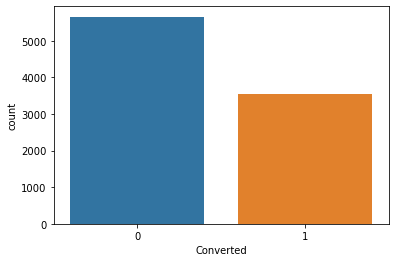

In [1852]:
sns.countplot(churn['Converted'])
plt.show()

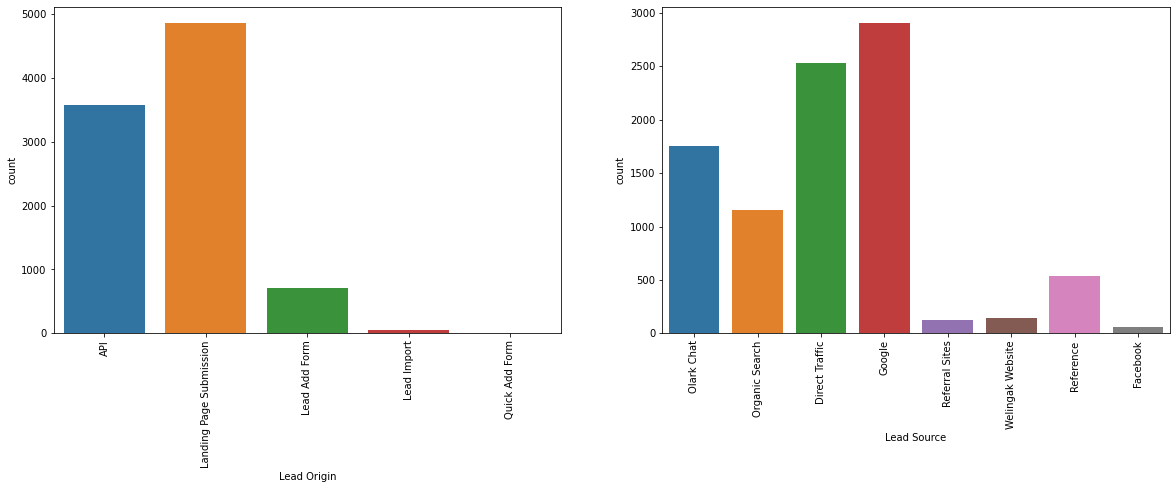

In [1853]:
# Plot bar graphs for all the Categorical features
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.countplot(churn['Lead Origin']).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(churn['Lead Source']).tick_params(axis='x', rotation = 90)

plt.show()

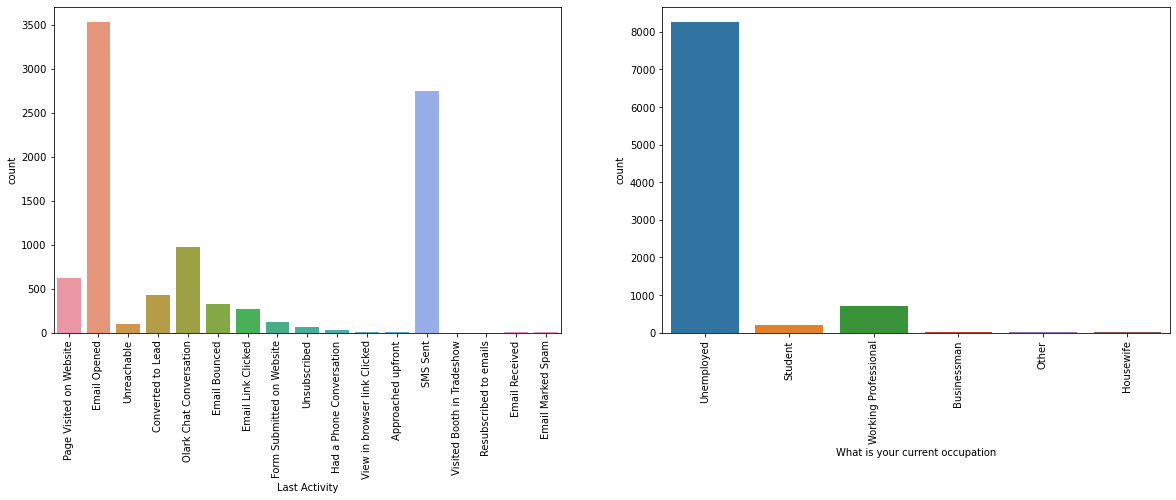

In [1854]:
# Plot bar graphs for all the Categorical features
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.countplot(churn['Last Activity']).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(churn["What is your current occupation"]).tick_params(axis='x', rotation = 90)

plt.show()

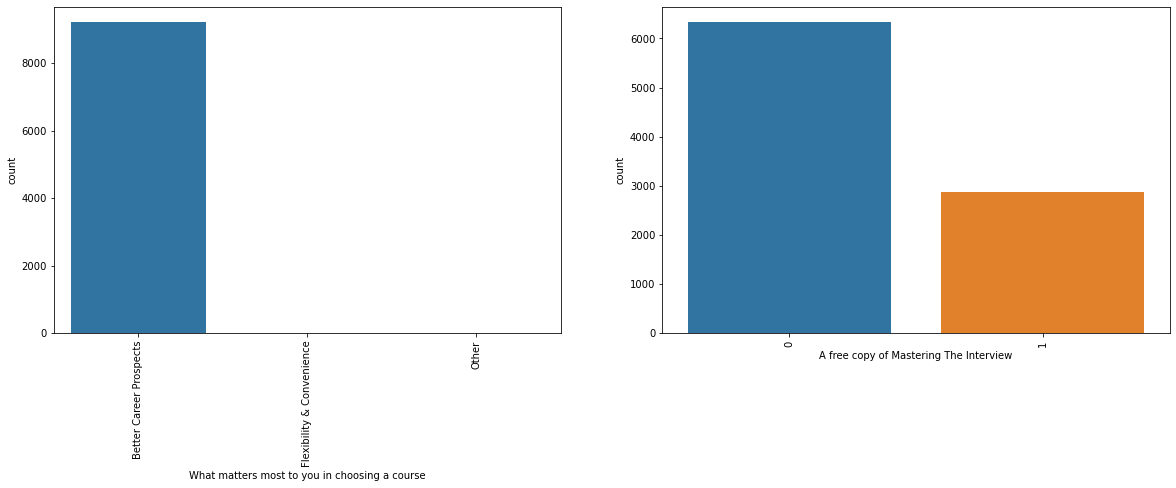

In [1855]:
# Plot bar graphs for all the Categorical features
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.countplot(churn['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)

plt.subplot(1,2,2)
sns.countplot(churn['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 90)

plt.show()

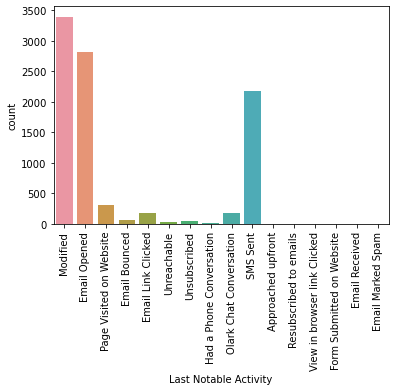

In [1856]:
# Plot bar graphs for all the Categorical features

sns.countplot(churn['Last Notable Activity']).tick_params(axis='x', rotation = 90)

plt.show()

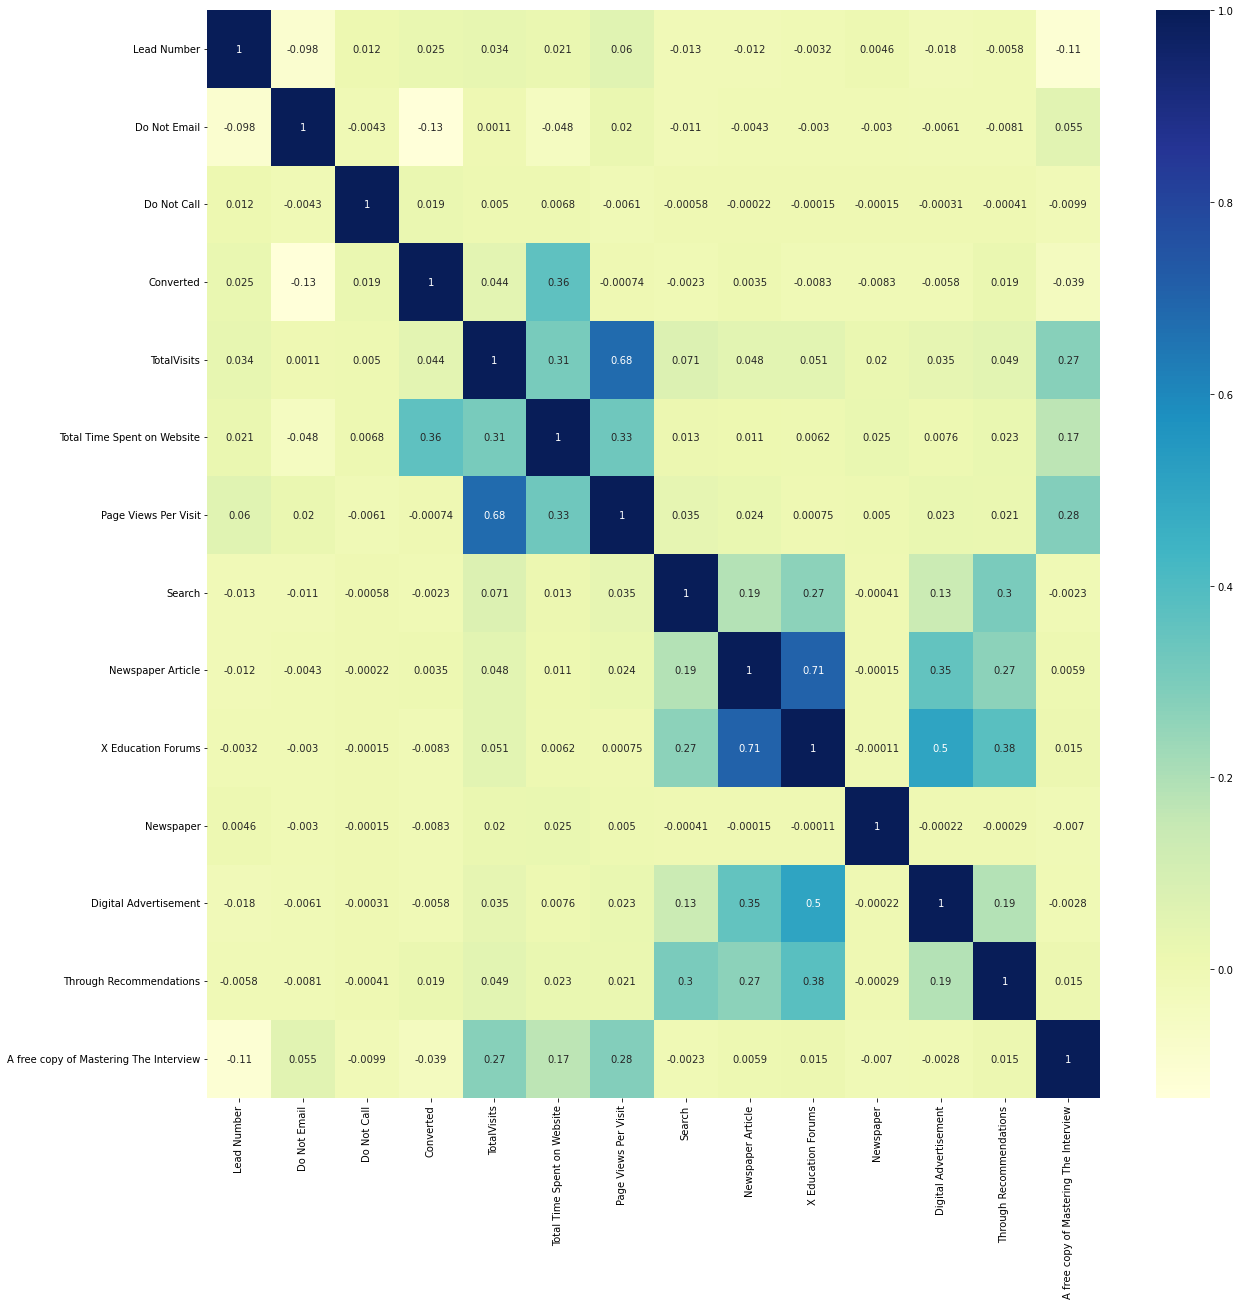

In [1857]:
# Plot a heatmap to see the correlation between all the variables in the training dataframe
plt.figure(figsize = [20,20])
sns.heatmap(churn.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

#### From the above Heatmap, we can see that features 'Newspaper Article' and 'X Education Forums' are correlated ones. However, as they are not very strongly correlated, we will retain them

## Step 3: Data Preparation

## For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1858]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy1 = pd.get_dummies(churn[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation', 'What matters most to you in choosing a course',
                              'Tags', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
churn = pd.concat([churn, dummy1], axis=1)

In [1859]:
# After creating dummies, check how many columns are in the dataframe
churn.shape

(9207, 122)

In [1860]:
# Check the header
churn.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no data,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_no data,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_no data,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,no data,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,no data,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1

In [1861]:
# Now that we have ceated dummies, let's remove the main features from the dataframe
churn.drop(columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                      'What is your current occupation', 'What matters most to you in choosing a course',
                      'Tags', 'City', 'Last Notable Activity'], inplace = True)

In [1862]:
# Check the dimensions to reconfirm the removal of above features
churn.shape

(9207, 113)

## Step 4: Test-Train Split

In [1863]:
# Putting all feature variables to X
X = churn.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no data,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_no data,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_no data,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [1864]:
# Putting response variable 'Converted' to y
y = churn['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1865]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Scaling

In [1866]:
# Instantiate the Standard Scaler class for scaling all the varaibles
scaler = StandardScaler()

# Do a fit transform to scale the variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no data,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_no data,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_no data,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2182,0,0,0.193281,-0.804686,0.797767,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5966,0,0,-0.099710,-0.419383,0.314578,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8886,0,0,-0.392701,1.494287,-0.651800,0,0,0,0,0,0,0

In [1867]:
# Checking the Churn Rate
sum(churn['Converted'])/len(churn['Converted'].index)*100

38.557619202780494

#### We have ~39% Churn rate

## Step 6: Model Building

### Running Your First Training Model - Model 1

In [1868]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                          102
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Mar 2023   Deviance:                       42552.
Time:                        18:39:49   Pearson chi2:                 2.08e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    9.408e+14   3.69e+07   2.55e+07      0.000    9.41e+14    9.41e+14
Do Not Email                                                            -1.666e+14   4.43e+06  -3.76e+07      0.000   -1.67e+14   -1.67e+14
Do Not Call                                                               5.91e+13   6.74e+07   8.77e+05      0.000    5.91e+13    5.91e+13
TotalVisits                                                              3.862e+13   1.27e+06   3.05e+07      0.000    3.86e+13    3.86e+13
Total Time Spent on Website                                              1.596e+14   1.01e+06   1.57e+08      0.000     1.6e+14     1.6e+14
Page Views Per Visit                                                    -4.572e+13   1.36e+06  -3.36e+07      0.000   -4.57e+13   -4.57e+13
Search                                                                  -2.573e+14   2.22e+07  -1.16e+07      0.000   -2.57e+14   -2.57e+14
Newspaper Article                                                       -2.616e+15   5.03e+07   -5.2e+07      0.000   -2.62e+15   -2.62e+15
X Education Forums                                                      -2.616e+15   5.03e+07   -5.2e+07      0.000   -2.62e+15   -2.62e+15
Newspaper                                                               -6.861e+15   6.75e+07  -1.02e+08      0.000   -6.86e+15   -6.86e+15
Digital Advertisement                                                    3.989e+14   6.74e+07   5.92e+06      0.000    3.99e+14    3.99e+14
Through Recommendations                                                  1.943e+14   2.86e+07   6.79e+06      0.000    1.94e+14    1.94e+14
A free copy of Mastering The Interview                                   4.493e+13   2.74e+06   1.64e+07      0.000    4.49e+13    4.49e+13
Lead Origin_Landing Page Submission                                     -8.482e+12   3.73e+06  -2.28e+06      0.000   -8.48e+12   -8.48e+12
Lead Origin_Lead Add Form                                                4.362e+14    1.4e+07   3.11e+07      0.000    4.36e+14    4.36e+14
Lead Origin_Lead Import                                                  4.445e+15   6.88e+07   6.46e+07      0.000    4.44e+15    4.44e+15
Lead Origin_Quick Add Form                                                -23.8244   6.13e-07  -3.89e+07      0.000     -23.824     -23.824
Lead Source_Facebook                                                    -4.341e+15   6.79e+07  -6.39e+07      0.000   -4.34e+15   -4.34e+15
Lead Source_Google                                                       1.048e+14   2.86e+06   3.66e+07      0.000    1.05e+14    1.05e+14
Lea

## Step 7: Feature Selection Using RFE

In [1869]:
# Create instance for LogisticRegression
logreg = LogisticRegression()

In [1870]:
# Call rfe method to remove the features whose contribution to the model is not significant
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1871]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 83),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Search', False, 39),
 ('Newspaper Article', False, 63),
 ('X Education Forums', False, 59),
 ('Newspaper', False, 71),
 ('Digital Advertisement', False, 48),
 ('Through Recommendations', False, 86),
 ('A free copy of Mastering The Interview', False, 78),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 88),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 17),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Em

In [1872]:
col = X_train.columns[rfe.support_]

In [1873]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachabl

### Model 2 - Run the model after reducing the no. of variables to 20 using RFE method

In [1874]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1235.0
Date:                Sun, 05 Mar 2023   Deviance:                       2469.9
Time:                        18:40:06   Pearson chi2:                 9.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6131
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5956      0.249    -14.414      0.000      -4.084      -3.107
Total Time Spent on Website                       1.1270      0.062     18.216      0.000       1.006       1.248
Lead Origin_Lead Add Form                         1.1804      0.344      3.432      0.001       0.506       1.855
Lead Source_Olark Chat                            1.3847      0.149      9.280      0.000       1.092       1.677
Lead Source_Welingak Website                      4.6359      0.806      5.749      0.000       3.055       6.217
Last Activity_SMS Sent                            1.1169      0.229      4.872      0.000       0.668       1.566
Tags_Busy                                         2.7244      0.337      8.075      0.000       2.063       3.386
Tags_Closed by Horizzon                           9.4008      1.057      8.898      0.000       7.330      11.472
Tags_Interested in Next batch                    23.8004   3.32e+04      0.001      0.999    -6.5e+04    6.51e+04
Tags_Interested in other courses                 -0.5603      0.542     -1.033      0.301      -1.623       0.502
Tags_Lateral student                             26.3375   5.15e+04      0.001      1.000   -1.01e+05    1.01e+05
Tags_Lost to EINS                                 7.6586      0.647     11.846      0.000       6.391       8.926
Tags_Ringing                                     -1.4020      0.328     -4.269      0.000      -2.046      -0.758
Tags_Will revert after reading the email          6.4765      0.300     21.620      0.000       5.889       7.064
Tags_invalid number                              -1.5615      1.077     -1.450      0.147      -3.672       0.549
Tags_no data                                      1.7989      0.250      7.202      0.000       1.309       2.288
Tags_switched off                                -2.0051      0.653     -3.072      0.002      -3.284      -0.726
Tags_wrong number given                         -21.0667   1.27e+04     -0.002      0.999   -2.48e+04    2.48e+04
Last Notable Activity_Modified                   -1.4494      0.152     -9.545      0.000      -1.747      -1.152
Last Notable Activity_Olark Chat Conversation    -1.6941      0.417     -4.060      0.000      -2.512      -0.876
Last Notable Activity_SMS Sent                    1.0387      0.265      3.926      0.000       0.520       1.557
=================================================================================================================
"""

In [1875]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2182    0.108071
5966    0.035074
8886    0.985691
8721    0.004725
6486    0.901185
3074    0.996724
2723    0.991191
499     0.005376
8329    0.195945
504     0.298402
dtype: float64

In [1876]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10807132, 0.03507353, 0.98569103, 0.00472496, 0.90118461,
       0.99672368, 0.99119133, 0.00537589, 0.19594534, 0.29840211])

##### Creating a dataframe with the actual churn flag (Converted) and the predicted probabilities

In [1877]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number
0,1,0.108071,2182
1,0,0.035074,5966
2,1,0.985691,8886
3,0,0.004725,8721
4,1,0.901185,6486


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1878]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number,predicted
0,1,0.108071,2182,0
1,0,0.035074,5966,0
2,1,0.985691,8886,1
3,0,0.004725,8721,0
4,1,0.901185,6486,1


In [1879]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3803  160]
 [ 287 2194]]


In [1880]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.930633147113594


'Tags_Lateral student' has high p-value of 1. Let' drop the column

In [1881]:
# Let's drop TotalCharges since it has high p-value
col = col.drop('Tags_Lateral student')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_no data', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 3 - Run the model after removing the feature having high p-value

In [1882]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.9
Date:                Sun, 05 Mar 2023   Deviance:                       2479.8
Time:                        18:40:07   Pearson chi2:                 9.44e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6125
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5048      0.240    -14.597      0.000      -3.975      -3.034
Total Time Spent on Website                       1.1224      0.062     18.205      0.000       1.002       1.243
Lead Origin_Lead Add Form                         1.2608      0.345      3.654      0.000       0.585       1.937
Lead Source_Olark Chat                            1.3939      0.149      9.357      0.000       1.102       1.686
Lead Source_Welingak Website                      4.5533      0.807      5.644      0.000       2.972       6.135
Last Activity_SMS Sent                            1.1552      0.228      5.061      0.000       0.708       1.603
Tags_Busy                                         2.6259      0.331      7.944      0.000       1.978       3.274
Tags_Closed by Horizzon                           9.2585      1.052      8.797      0.000       7.196      11.321
Tags_Interested in Next batch                    23.6651   3.33e+04      0.001      0.999   -6.52e+04    6.52e+04
Tags_Interested in other courses                 -0.6555      0.538     -1.218      0.223      -1.710       0.399
Tags_Lost to EINS                                 7.5538      0.643     11.753      0.000       6.294       8.813
Tags_Ringing                                     -1.5030      0.321     -4.676      0.000      -2.133      -0.873
Tags_Will revert after reading the email          6.3681      0.291     21.919      0.000       5.799       6.937
Tags_invalid number                              -1.6639      1.075     -1.548      0.122      -3.770       0.442
Tags_no data                                      1.6980      0.240      7.063      0.000       1.227       2.169
Tags_switched off                                -2.1044      0.649     -3.242      0.001      -3.377      -0.832
Tags_wrong number given                         -21.1664   1.27e+04     -0.002      0.999   -2.48e+04    2.48e+04
Last Notable Activity_Modified                   -1.4489      0.152     -9.558      0.000      -1.746      -1.152
Last Notable Activity_Olark Chat Conversation    -1.6911      0.416     -4.061      0.000      -2.507      -0.875
Last Notable Activity_SMS Sent                    1.0122      0.264      3.840      0.000       0.496       1.529
=================================================================================================================
"""

In [1883]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1884]:
y_train_pred[:10]

array([0.11148031, 0.03519369, 0.98589063, 0.00518096, 0.90065584,
       0.99669523, 0.99115106, 0.00542636, 0.19643291, 0.29435676])

In [1885]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [1886]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number,predicted
0,1,0.111480,2182,0
1,0,0.035194,5966,0
2,1,0.985891,8886,1
3,0,0.005181,8721,0
4,1,0.900656,6486,1


In [1887]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.930477963997517


The accuracy is still practically the same.

Let's remove 'Tags_wrong number given' as the P-value is very high

In [1888]:
col = col.drop('Tags_wrong number given')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_no data', 'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 4 - Run the model after removing the feature based on high p-Value

In [1889]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.8
Date:                Sun, 05 Mar 2023   Deviance:                       2485.5
Time:                        18:40:07   Pearson chi2:                 9.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6122
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6361      0.240    -15.172      0.000      -4.106      -3.166
Total Time Spent on Website                       1.1261      0.062     18.251      0.000       1.005       1.247
Lead Origin_Lead Add Form                         1.2740      0.346      3.685      0.000       0.596       1.952
Lead Source_Olark Chat                            1.4039      0.149      9.424      0.000       1.112       1.696
Lead Source_Welingak Website                      4.5436      0.807      5.630      0.000       2.962       6.125
Last Activity_SMS Sent                            1.1516      0.228      5.042      0.000       0.704       1.599
Tags_Busy                                         2.7659      0.329      8.414      0.000       2.122       3.410
Tags_Closed by Horizzon                           9.3840      1.053      8.915      0.000       7.321      11.447
Tags_Interested in Next batch                    21.8159   1.22e+04      0.002      0.999    -2.4e+04     2.4e+04
Tags_Interested in other courses                 -0.5243      0.537     -0.976      0.329      -1.578       0.529
Tags_Lost to EINS                                 7.6835      0.643     11.954      0.000       6.424       8.943
Tags_Ringing                                     -1.3551      0.318     -4.258      0.000      -1.979      -0.731
Tags_Will revert after reading the email          6.4999      0.290     22.401      0.000       5.931       7.069
Tags_invalid number                              -1.5126      1.073     -1.409      0.159      -3.617       0.591
Tags_no data                                      1.8329      0.239      7.664      0.000       1.364       2.302
Tags_switched off                                -1.9534      0.647     -3.017      0.003      -3.222      -0.685
Last Notable Activity_Modified                   -1.4496      0.152     -9.551      0.000      -1.747      -1.152
Last Notable Activity_Olark Chat Conversation    -1.6992      0.417     -4.078      0.000      -2.516      -0.882
Last Notable Activity_SMS Sent                    0.9897      0.263      3.761      0.000       0.474       1.505
=================================================================================================================
"""

In [1890]:
# Let's drop the feature with high p-value
col = col.drop('Tags_Interested in Next batch')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_no data', 'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 5 - Run the model after removing the feature based on high p-Value

In [1891]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.4
Date:                Sun, 05 Mar 2023   Deviance:                       2492.8
Time:                        18:40:07   Pearson chi2:                 9.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.5336      0.227    -15.533      0.000      -3.980      -3.088
Total Time Spent on Website                       1.1276      0.061     18.348      0.000       1.007       1.248
Lead Origin_Lead Add Form                         1.3524      0.346      3.908      0.000       0.674       2.031
Lead Source_Olark Chat                            1.4032      0.149      9.423      0.000       1.111       1.695
Lead Source_Welingak Website                      4.4706      0.807      5.539      0.000       2.889       6.053
Last Activity_SMS Sent                            1.1524      0.228      5.046      0.000       0.705       1.600
Tags_Busy                                         2.6521      0.320      8.294      0.000       2.025       3.279
Tags_Closed by Horizzon                           9.2381      1.048      8.814      0.000       7.184      11.292
Tags_Interested in other courses                 -0.6331      0.532     -1.189      0.234      -1.677       0.410
Tags_Lost to EINS                                 7.5750      0.638     11.870      0.000       6.324       8.826
Tags_Ringing                                     -1.4831      0.308     -4.815      0.000      -2.087      -0.879
Tags_Will revert after reading the email          6.3839      0.279     22.873      0.000       5.837       6.931
Tags_invalid number                              -1.6385      1.071     -1.530      0.126      -3.737       0.460
Tags_no data                                      1.7222      0.226      7.607      0.000       1.278       2.166
Tags_switched off                                -2.0805      0.643     -3.238      0.001      -3.340      -0.821
Last Notable Activity_Modified                   -1.4490      0.152     -9.555      0.000      -1.746      -1.152
Last Notable Activity_Olark Chat Conversation    -1.6926      0.416     -4.064      0.000      -2.509      -0.876
Last Notable Activity_SMS Sent                    1.0171      0.263      3.867      0.000       0.502       1.533
=================================================================================================================
"""

In [1892]:
# Let's drop the feature with high p-value
col = col.drop('Tags_Interested in other courses')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_no data', 'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 6 - Run the model after removing the feature based on high p-Value

In [1893]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.2
Date:                Sun, 05 Mar 2023   Deviance:                       2494.4
Time:                        18:40:07   Pearson chi2:                 9.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6116
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6582      0.211    -17.368      0.000      -4.071      -3.245
Total Time Spent on Website                       1.1278      0.061     18.355      0.000       1.007       1.248
Lead Origin_Lead Add Form                         1.3563      0.347      3.913      0.000       0.677       2.036
Lead Source_Olark Chat                            1.4023      0.149      9.421      0.000       1.111       1.694
Lead Source_Welingak Website                      4.4675      0.807      5.532      0.000       2.885       6.050
Last Activity_SMS Sent                            1.1601      0.228      5.083      0.000       0.713       1.607
Tags_Busy                                         2.7782      0.307      9.036      0.000       2.176       3.381
Tags_Closed by Horizzon                           9.3701      1.044      8.975      0.000       7.324      11.416
Tags_Lost to EINS                                 7.7083      0.631     12.213      0.000       6.471       8.945
Tags_Ringing                                     -1.3589      0.296     -4.598      0.000      -1.938      -0.780
Tags_Will revert after reading the email          6.5135      0.264     24.680      0.000       5.996       7.031
Tags_invalid number                              -1.5141      1.067     -1.418      0.156      -3.606       0.578
Tags_no data                                      1.8494      0.208      8.884      0.000       1.441       2.257
Tags_switched off                                -1.9563      0.637     -3.073      0.002      -3.204      -0.708
Last Notable Activity_Modified                   -1.4610      0.151     -9.657      0.000      -1.758      -1.164
Last Notable Activity_Olark Chat Conversation    -1.7059      0.416     -4.097      0.000      -2.522      -0.890
Last Notable Activity_SMS Sent                    1.0099      0.263      3.842      0.000       0.495       1.525
=================================================================================================================
"""

In [1894]:
# Let's drop the feature with high p-value
col = col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_no data',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 7 - Run the model after removing the feature based on high p-Value

In [1895]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.7
Date:                Sun, 05 Mar 2023   Deviance:                       2497.4
Time:                        18:40:07   Pearson chi2:                 9.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6115
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7510      0.208    -18.071      0.000      -4.158      -3.344
Total Time Spent on Website                       1.1330      0.061     18.452      0.000       1.013       1.253
Lead Origin_Lead Add Form                         1.3707      0.348      3.944      0.000       0.690       2.052
Lead Source_Olark Chat                            1.4068      0.149      9.464      0.000       1.116       1.698
Lead Source_Welingak Website                      4.4562      0.808      5.517      0.000       2.873       6.039
Last Activity_SMS Sent                            1.1557      0.229      5.058      0.000       0.708       1.604
Tags_Busy                                         2.8771      0.304      9.457      0.000       2.281       3.473
Tags_Closed by Horizzon                           9.4551      1.044      9.059      0.000       7.409      11.501
Tags_Lost to EINS                                 7.7983      0.630     12.369      0.000       6.563       9.034
Tags_Ringing                                     -1.2536      0.291     -4.306      0.000      -1.824      -0.683
Tags_Will revert after reading the email          6.6055      0.262     25.245      0.000       6.093       7.118
Tags_no data                                      1.9454      0.204      9.523      0.000       1.545       2.346
Tags_switched off                                -1.8483      0.634     -2.913      0.004      -3.092      -0.605
Last Notable Activity_Modified                   -1.4584      0.151     -9.626      0.000      -1.755      -1.161
Last Notable Activity_Olark Chat Conversation    -1.7083      0.417     -4.098      0.000      -2.525      -0.891
Last Notable Activity_SMS Sent                    0.9928      0.263      3.778      0.000       0.478       1.508
=================================================================================================================
"""

In [1896]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,5.95
4,Last Activity_SMS Sent,5.74
1,Lead Origin_Lead Add Form,1.87
12,Last Notable Activity_Modified,1.74
9,Tags_Will revert after reading the email,1.71
10,Tags_no data,1.66
2,Lead Source_Olark Chat,1.64
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.33
6,Tags_Closed by Horizzon,1.32


In [1897]:
# Let's drop the feature with high VIF
col = col.drop('Last Notable Activity_SMS Sent')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_no data',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 8 - Run the model after removing the feature based on high VIF

In [1898]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6444
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.9
Date:                Sun, 05 Mar 2023   Deviance:                       2511.9
Time:                        18:40:08   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6574      0.204    -17.888      0.000      -4.058      -3.257
Total Time Spent on Website                       1.1267      0.061     18.474      0.000       1.007       1.246
Lead Origin_Lead Add Form                         1.4016      0.354      3.960      0.000       0.708       2.095
Lead Source_Olark Chat                            1.4435      0.147      9.800      0.000       1.155       1.732
Lead Source_Welingak Website                      4.4125      0.813      5.428      0.000       2.819       6.006
Last Activity_SMS Sent                            1.8993      0.115     16.484      0.000       1.673       2.125
Tags_Busy                                         2.8754      0.301      9.555      0.000       2.286       3.465
Tags_Closed by Horizzon                           9.6065      1.045      9.189      0.000       7.558      11.655
Tags_Lost to EINS                                 7.9106      0.634     12.482      0.000       6.668       9.153
Tags_Ringing                                     -1.1586      0.287     -4.031      0.000      -1.722      -0.595
Tags_Will revert after reading the email          6.6608      0.263     25.287      0.000       6.145       7.177
Tags_no data                                      1.9181      0.203      9.444      0.000       1.520       2.316
Tags_switched off                                -1.7331      0.632     -2.742      0.006      -2.972      -0.494
Last Notable Activity_Modified                   -1.8088      0.127    -14.281      0.000      -2.057      -1.561
Last Notable Activity_Olark Chat Conversation    -1.8125      0.417     -4.348      0.000      -2.630      -0.995
=================================================================================================================
"""

In [1899]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.87
9,Tags_Will revert after reading the email,1.65
10,Tags_no data,1.65
4,Last Activity_SMS Sent,1.63
2,Lead Source_Olark Chat,1.61
0,Total Time Spent on Website,1.42
12,Last Notable Activity_Modified,1.42
3,Lead Source_Welingak Website,1.33
6,Tags_Closed by Horizzon,1.32
8,Tags_Ringing,1.13


In [1900]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2182    0.168233
5966    0.032633
8886    0.991653
8721    0.003106
6486    0.881959
3074    0.996255
2723    0.989942
499     0.006545
8329    0.214923
504     0.239137
dtype: float64

In [1901]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16823315, 0.03263288, 0.9916531 , 0.00310597, 0.88195893,
       0.99625537, 0.98994227, 0.00654509, 0.21492288, 0.23913704])

In [1902]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number
0,1,0.168233,2182
1,0,0.032633,5966
2,1,0.991653,8886
3,0,0.003106,8721
4,1,0.881959,6486


In [1903]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number,predicted
0,1,0.168233,2182,0
1,0,0.032633,5966,0
2,1,0.991653,8886,1
3,0,0.003106,8721,0
4,1,0.881959,6486,1


In [1904]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3802  161]
 [ 286 2195]]


In [1905]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.930633147113594


## Metrics beyond simply accuracy

In [1906]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1907]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8847239016525594

In [1908]:
# Let us calculate specificity
TN / float(TN+FP)

0.9593742114559677

In [1909]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0406257885440323


In [1910]:
# positive predictive value 
print (TP / float(TP+FP))

0.9316638370118846


In [1911]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9300391389432485


## Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1912]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1913]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Converted_Prob, drop_intermediate = False )

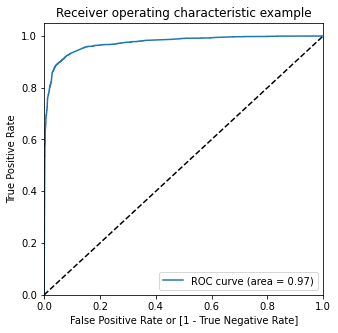

In [1914]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Converted_Prob)

## Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1915]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.168233,2182,0,1,1,0,0,0,0,0,0,0,0
1,0,0.032633,5966,0,1,0,0,0,0,0,0,0,0,0
2,1,0.991653,8886,1,1,1,1,1,1,1,1,1,1,1
3,0,0.003106,8721,0,1,0,0,0,0,0,0,0,0,0
4,1,0.881959,6486,1,1,1,1,1,1,1,1,1,1,0


In [1916]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385009  1.000000  0.000000
0.1   0.1  0.849628  0.966949  0.776180
0.2   0.2  0.895407  0.954454  0.858441
0.3   0.3  0.922408  0.919387  0.924300
0.4   0.4  0.926133  0.901249  0.941711
0.5   0.5  0.930633  0.884724  0.959374
0.6   0.6  0.928461  0.863765  0.968963
0.7   0.7  0.912787  0.807336  0.978804
0.8   0.8  0.905493  0.780734  0.983598
0.9   0.9  0.887027  0.723499  0.989402


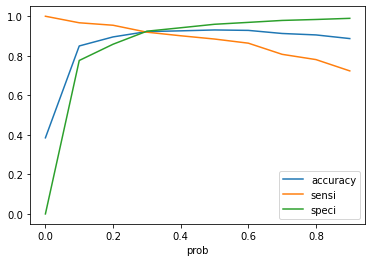

In [1917]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.29 is the optimum point to take as a cutoff probability

In [1918]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.29 else 0)

y_train_pred_final.head()

,Churn,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.168233,2182,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.032633,5966,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.991653,8886,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.003106,8721,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.881959,6486,1,1,1,1,1,1,1,1,1,1,0,1


In [1919]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9222532588454376

In [1920]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[3661,  302],
       [ 199, 2282]], dtype=int64)

In [1921]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1922]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9197904070939138

In [1923]:
# Let us calculate specificity
TN / float(TN+FP)

0.9237951047186475

In [1924]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0762048952813525


In [1925]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8831269349845201


In [1926]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9484455958549223


### Precision and recall tradeoff

In [1927]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Churn, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6439    1
 6440    1
 6441    1
 6442    0
 6443    1
 Name: Churn, Length: 6444, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6439    1
 6440    1
 6441    1
 6442    0
 6443    1
 Name: predicted, Length: 6444, dtype: int64)

In [1928]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Converted_Prob)

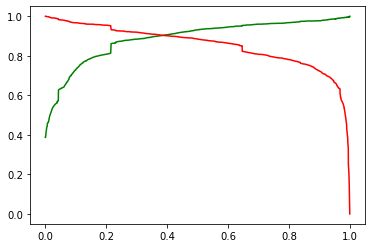

In [1929]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### **The above graph shows the trade-off between the Precision and Recall .

## Step 10:  Making predictions on the test set
#### Scaling the test data

In [1930]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [1931]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_no data,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2403,1.725469,0,0,0,1,0,0,0,0,1,0,0,0,0
848,2.162146,0,0,0,0,0,0,0,0,1,0,0,1,0
7462,-0.127654,0,0,0,1,0,0,0,0,0,0,0,0,0
6185,-0.887251,0,1,0,0,0,0,0,0,0,1,0,1,0
4890,-0.887251,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1932]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2403    0.998938
848     0.974187
7462    0.129886
6185    0.042928
4890    0.967869
2523    0.990425
5420    0.003953
2105    0.999195
3990    0.003558
3512    0.006545
dtype: float64

In [1933]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1934]:
# Let's see the head
y_pred_1.head()

,0
2403,0.998938
848,0.974187
7462,0.129886
6185,0.042928
4890,0.967869


In [1935]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1936]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [1937]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1938]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1939]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,2403,0.998938
1,1,848,0.974187
2,0,7462,0.129886
3,0,6185,0.042928
4,1,4890,0.967869


In [1940]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1941]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [1942]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,2403,1,0.998938
1,848,1,0.974187
2,7462,0,0.129886
3,6185,0,0.042928
4,4890,1,0.967869


In [1943]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.29 else 0)

In [1944]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,2403,1,0.998938,1
1,848,1,0.974187,1
2,7462,0,0.129886,0
3,6185,0,0.042928,0
4,4890,1,0.967869,1


In [1945]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.9200144770177343


In [1946]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1566,  128],
       [  93,  976]], dtype=int64)

In [1947]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1948]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.9130028063610851


In [1949]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.9244391971664699


#### Assigning Lead Score to the Testing data

In [1950]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,2403,1,0.998938,1,100
1,848,1,0.974187,1,97
2,7462,0,0.129886,0,13
3,6185,0,0.042928,0,4
4,4890,1,0.967869,1,97


### Results :
1) Comparing the values obtained for Train & Test:
- Train Data:
    - Accuracy : 92.22 %
    - Sensitivity : 91.97 %
    - Specificity : 92.37 %
- Test Data:
    - Accuracy : 92.00 %
    - Sensitivity : 91.30 %
    - Specificity : 92.44 %

In [1951]:
y_pred_final["final_predicted"].value_counts()

0    1659
1    1104
Name: final_predicted, dtype: int64

In [1952]:
y_pred_final[y_pred_final["final_predicted"] == 1]

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,2403,1,0.998938,1,100
1,848,1,0.974187,1,97
4,4890,1,0.967869,1,97
5,2523,1,0.990425,1,99
7,2105,1,0.999195,1,100
...,...,...,...,...,...
2756,4333,1,0.743114,1,74
2758,1052,1,0.771716,1,77
2760,9104,1,0.718732,1,72
2761,6154,1,0.999097,1,100


### Considering test data (30% - 2763 no. of customer records) as the actual case, from the above table, it's clear that the the final model has predicted 1104 no. of customers as the lead converts. The company should first target and approach these Customers first for lead convert